In [1]:
# 1 Load the dataset and explore the variables.

In [73]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
df_original = pd.read_csv(r'C:\Users\aidag\OneDrive\Escritorio\ironhack\lab-imbalanced-data\files_for_lab\customer_churn.csv')

In [23]:
df_original.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df_original.shape

(7043, 21)

In [25]:
df_original.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
df_original.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [27]:
df_original.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df_original.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
df_original['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [30]:
df_original['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [66]:
df_copy = df_original
df_copy.columns = df_copy.columns.str.capitalize()
df_copy = df_copy.set_index('Customerid')
df_copy.head(3)

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
Customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [36]:
# 2 We will try to predict variable Churn using a logistic regression on variables Tenure, Seniorcitizen, Monthlycharges.

In [47]:
target_variable = 'Churn'
features = ['Tenure', 'Seniorcitizen', 'Monthlycharges']

X = df_copy[features]
y = df_copy[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7936583057264552
Confusion Matrix:
[[1420  119]
 [ 317  257]]
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [14]:
# 3 Extract the target variable.

In [48]:
target_variable = 'Churn'
y = df_copy[target_variable]
y.head()

Customerid
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
Name: Churn, dtype: object

In [15]:
# 4 Extract the independent variables and scale them.

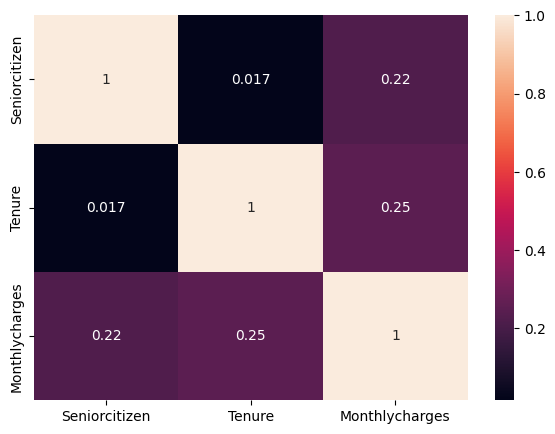

In [52]:
corr_matrix = df_copy.select_dtypes("number").corr(method='pearson')  
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#Independent variables are Seniorcitizen and Tenure because their values are near from 0, more independent than the rest

In [55]:
#Stracting
X = df_copy[['Seniorcitizen', 'Tenure']]

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# 5 Build the logistic regression model.

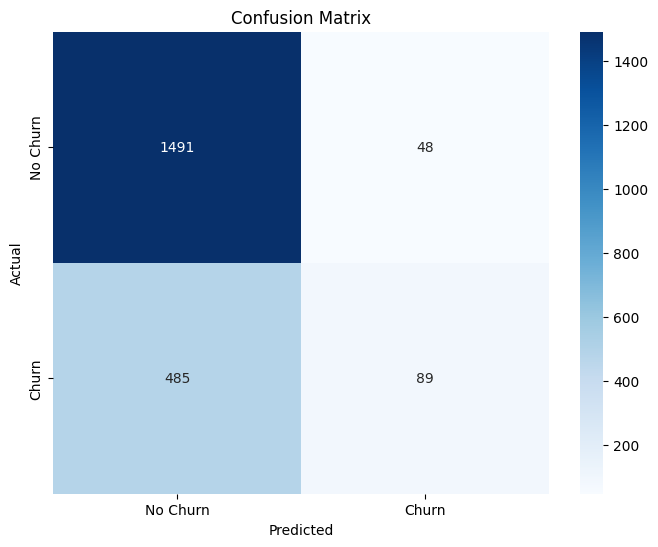

Accuracy: 0.7477520113582584

Classification Report:
               precision    recall  f1-score   support

          No       0.75      0.97      0.85      1539
         Yes       0.65      0.16      0.25       574

    accuracy                           0.75      2113
   macro avg       0.70      0.56      0.55      2113
weighted avg       0.73      0.75      0.69      2113



In [56]:
X = df_copy[['Seniorcitizen', 'Tenure']]
y = df_copy['Churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy}\n')
print('Classification Report:\n', class_report)

In [17]:
# 6 Evaluate the model.

In [58]:
print("The model performs reasonably well in predicting customers who will not leave, but struggles to correctly identify those who will leave.")

The model performs reasonably well in predicting customers who will not leave, but struggles to correctly identify those who will leave.


In [18]:
# 7 Even a simple model will give us more than 70% accuracy. Why?

In [62]:
print("A simple model can reach more than 70% accuracy even without complex features or sophisticated algorithms because the dataset might have imbalanced classes. In this context, if one class (e.g., 'No Churn') is significantly more prevalent than the other (e.g., 'Churn'), a naive model that predicts the majority class for every instance can still achieve high accuracy. However, this high accuracy might not necessarily reflect the models ability to generalize well or make accurate predictions for the minority class.")

A simple model can reach more than 70% accuracy even without complex features or sophisticated algorithms because the dataset might have imbalanced classes. In this context, if one class (e.g., 'No Churn') is significantly more prevalent than the other (e.g., 'Churn'), a naive model that predicts the majority class for every instance can still achieve high accuracy. However, this high accuracy might not necessarily reflect the models ability to generalize well or make accurate predictions for the minority class.


In [19]:
# 8 Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new
  # points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression
  # model. Is it there any improvement?

In [72]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7048309178743961
Confusion Matrix:
[[654 367]
 [244 805]]
Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.64      0.68      1021
         Yes       0.69      0.77      0.72      1049

    accuracy                           0.70      2070
   macro avg       0.71      0.70      0.70      2070
weighted avg       0.71      0.70      0.70      2070



In [20]:
# 9 Tomek links are pairs of very close instances, but of opposite classes.
  # Removing the instances of the majority class of each
  # pair increases the space between the two classes, facilitating the classification process.
  # Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. 
  # Is it there any improvement?

In [74]:
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7539044013251301
Confusion Matrix:
[[1504   48]
 [ 472   89]]
Classification Report:
              precision    recall  f1-score   support

          No       0.76      0.97      0.85      1552
         Yes       0.65      0.16      0.26       561

    accuracy                           0.75      2113
   macro avg       0.71      0.56      0.55      2113
weighted avg       0.73      0.75      0.69      2113

